In [0]:
# Fill in your name using the format below and student ID number
your_name = "Keles, Isilsu"
student_id = "1035673"

In [0]:
# Before submission, set this to True so that you can render and verify this notebook without training deep learning models.
# Any deep learning models will be trained from file instead.
stop_training = True

In [10]:
# Uncomment the following line to run in Google Colab
!pip install --quiet openml 

     |████████████████████████████████| 163kB 2.6MB/s 


In [11]:
# Uncomment the following line to run in Google Colab
%tensorflow_version 2.x
import tensorflow as tf
tf.config.experimental.list_physical_devices('GPU') # Check whether GPUs are available

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [0]:
%matplotlib inline
import openml as oml
import numpy as np
import matplotlib.pyplot as plt
import sklearn

In [13]:
from packaging import version
import sklearn
import tensorflow
sklearn_version = sklearn.__version__
tensorflow_version = tensorflow.__version__
if version.parse(sklearn_version) < version.parse("0.22.0"):
    print("scikit-learn is outdated. Please update now!")
if version.parse(tensorflow_version) < version.parse("2.1.0"):
    print("Tensorflow is outdated. This is version {}. Please update to 2.1.".format(tensorflow_version))
else:
    print("Hi{}, Looks good. You may continue :)".format(your_name.split(",")[1]))

Hi Isilsu, Looks good. You may continue :)


# Assignment 3

### Choice of libraries
We recommend to use Tensorflow in this assignment since that is what we covered in the labs. If you feel confident using PyTorch (and Skorch for the scikit-learn wrapper), that is allowed too, as long as you are able to implement the requested functions and return the requested data. Read the assignment carefully and ensure that you can. Note that you may also need to do a bit more work to implement certain helper functions and wrappers.

### Storing and submitting files
You must be able to store your models and submit them to GitHub Classroom. The evaluation functions used in this notebook will automatically store models for you.

If you want to run and solve the notebook on your local machine/laptop, fill in the path 'base_dir' to your assignment folder into the next cell.

If you use Colab, we recommend that you link it to your Google Drive:  
* Upload the assignment folder to your Google Drive (+ New > Folder Upload)
* Open Colab in a browser, open the 'Files' menu in the left sidebar, and click 'Mount Drive'
  * At this point you may need to authenticate
* Fill in the path to your assignment folder below
  * It's likely '/content/drive/My Drive/assignment-3-yourname'

In [0]:
base_dir = '/content/drive/My Drive/ass3' # For Google Colab
#base_dir = './'

In [15]:
#Uncomment to link Colab notebook to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


### Using GPUs
While you can solve this assignment on a CPU, using a GPU will speed things up training quite a bit. If you have a local GPU, you can use that. If you don't, we recommend Google Colab. When you are in Colab:
* In Runtime > Change runtime type, select the GPU under Hardware Accelerator
* Run the 3rd cell on the top of this notebook to check that the GPU is found.

Note that Colab may not always have GPUs ready all the time, and may deny you a GPU when you have used them a lot. When you are temporarily 'locked out', you can switch to a non-GPU runtime or to a local instance of Jupyter running on your machine.

### Constraints
* Your stored models should not be larger than 100MB when stored in file. GitHub will not allow uploading if they are.
* When questions ask you to provide an explanation, it should be less than 500
characters long. Some questions have a higher limit. Always answer in full sentences.
* Don't train for more than 100 epochs, i.e. don't throw excessing computational resources at the problem. If your model hasn't converged by then, think of ways it could be made to converge faster. In this assignment you are not after the last tiny improvement, you can stop when learning curves flatten out. Do at least 5 epochs to get a reasonable learning curve.

### Grading
Grading is based on the following aspects:
* Correctness in answering the question. Carefully read the question and answer
what is asked for. Train your models on the correct data. It should be clear on which data should be trained, but ask when in doubt. When something is not defined (e.g. the number of epochs or batch size), you can freely choose them.
* Clarity of your explanations. Write short but precise descriptions of what you did and why. Give short but clear explanations of the observed performance. 
After your explanation, your approach and model should make perfect sense. Refrain from using symbols as substitute for words in your explanation (e.g. no: "More layers -> more parameters" yes: "More layers mean more parameters"). 
* Part of your grade depends on how well your model performs. When the question says 'you should at least get x%', x% will give you a good but not the maximal grade. You can get the full grade when you are close to what is the expected maximal performance. You don't need to invest lots of effort into the last tiny improvement, though. Unless specified, we look at the accuracy on the validation set. If your learning curves are very erratic we'll compute a score based on the smoothed curves (i.e. single peaks don't count).
* The weight of each question is indicated. Take this into account when planning your time.

### Other tips
* Don't wait until the last minute to do the assignment. The models take time to train, most questions will require some thinking, and some require you to read up on some new concepts.
* Take care that you upload the results as requested. You need to submit not only the notebooks but also the trained models and learning curves (training histories). Be sure to run the verification script and check that all the results are included.
* We provide an evaluation function that also stored models to disk. After you are done training the model, set the 'train' attribute to False so that the model doesn't train again (and loads from file instead) when you restart and rerun your notebook.
* Explore. For many questions we'll ask you to explain your model design decisions. You cannot magically know the best solutions but you can experiment
based on your understanding and make decisions based on both your knowledge and experiments. Your explanation is at least as important as the performance of your model.
* Be original. We will check for plagiarism between student submissions.

### Data
The [Street View House Numbers Dataset](https://www.openml.org/d/41081) contains 32-by-32 RGB images centered around a single digit of a house number appearing in Google Street View. Many of the images do contain some distractors at the sides. It consists of 10 classes, 1 for each digit. Digit '1' has label 1, '9' has label 9 and '0' has label 10. Your goal is to build models that recognize the correct digit.

If you use Colab, uncomment the following to cache the dataset inside the VM. This will make reloading faster if you need to restart your notebook. After longer periods of inactivity, your VM may be recycled and the cache lost, in which case the dataset will be downloaded again. Also note that this dataset is about 1Gb large, and will take even more space in memory. You may need to switch to a high-RAM environment (Colab will ask you if you hit the limit).

In [0]:
# Use OpenML caching in Colab
# On your local machine, it will store data in a hidden folder '~/.openml'
import os
oml.config.cache_directory = os.path.expanduser('/content/cache')

In [0]:
# Download Streetview data. Takes a while (several minutes), and quite a bit of
# memory when it needs to download. After caching it loads faster.
SVHN = oml.datasets.get_dataset(41081)
X, y, _, _ = SVHN.get_data(dataset_format='array',
    target=SVHN.default_target_attribute)

Reshape, sample and split the data

In [0]:
from tensorflow.keras.utils import to_categorical

Xr = X.reshape((len(X),32,32,3))
Xr = Xr / 255.
yr = to_categorical(y)

In [0]:
# DO NOT EDIT. DO NOT OVERWRITE THESE VARIABLES.
from sklearn.model_selection import train_test_split
# We do an 80-20 split for the training and test set, and then again a 80-20 split into training and validation data
X_train_all, X_test, y_train_all, y_test = train_test_split(Xr,yr, stratify=yr, train_size=0.8, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train_all,y_train_all, stratify=y_train_all, train_size=0.8, random_state=1)
evaluation_split = X_train, X_val, y_train, y_val

Check the formatting - and what the data looks like

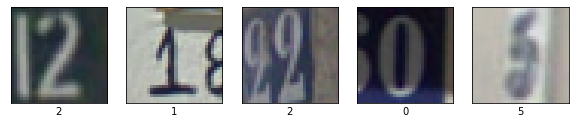

In [20]:
from random import randint

# Takes a list of row ids, and plots the corresponding images
# Use grayscale=True for plotting grayscale images
def plot_images(X, y, grayscale=False):
    fig, axes = plt.subplots(1, len(X),  figsize=(10, 5))
    for n in range(len(X)):
        if grayscale:
            axes[n].imshow(X[n], cmap='gray')
        else:
            axes[n].imshow(X[n])
        axes[n].set_xlabel((np.argmax(y[n])+1)%10) # Label is index+1
        axes[n].set_xticks(()), axes[n].set_yticks(())
    plt.show();

images = [randint(0,len(X_train)) for i in range(5)]
X_random = [X_train[i] for i in images]
y_random = [y_train[i] for i in images]
plot_images(X_random, y_random)

### Evaluation harness
We provide an evaluation function 'run_evaluation' that you should use to 
evaluate all your models. It also stores the trained models to disk so that
your submission can be quickly verified, as well as to avoid having to train
them over and over again. Your last run of the evaluation function (the last one
stored to file), is the one that will be evaluated. The 'train' argument indicates whether to train or to load from disk. We have provided helper functions for saving and loading models to/from file, assuming you use TensorFlow. If you use PyTorch you'll have to adapt them.

In [0]:
import os
import pickle
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model # for use with tensorflow

def shout(text, verbose=1):
    """ Prints text in red. Just for fun.
    """
    if verbose>0:
        print('\033[91m'+text+'\x1b[0m')

def load_model_from_file(base_dir, name, extension='.h5'):
    """ Loads a model from a file. The returned model must have a 'fit' and 'summary'
    function following the Keras API. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    base_dir -- Directory where the models are stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    try:
        model = load_model(os.path.join(base_dir, name+extension))
    except OSError:
        shout("Saved model could not be found. Was it trained and stored correctly? Is the base_dir correct?")
        return False
    return model

def save_model_to_file(model, base_dir, name, extension='.h5'):
    """ Saves a model to file. Don't change if you use TensorFlow. Otherwise,
    adapt as needed. 
    Keyword arguments:
    model -- the model to be saved
    base_dir -- Directory where the models should be stored
    name -- Name of the model, e.g. 'question_1_1'
    extension -- the file extension
    """
    model.save(os.path.join(base_dir, name+extension))

# Helper function to extract min/max from the learning curves
def minMax(x):
    return pd.Series(index=['min','max'],data=[x.min(),x.max()])

# DO NOT EDIT
def run_evaluation(name, model_builder, data, base_dir, train=True, 
                   generator=False, epochs=3, batch_size=32, steps_per_epoch=60, 
                   verbose=1, **kwargs):
    """ Trains and evaluates the given model on the predefined train and test splits,
    stores the trained model and learning curves. Also prints out a summary of the 
    model and plots the learning curves.
    Keyword arguments:
    name -- the name of the model to be stored, e.g. 'question_1_1.h5'
    model_builder -- function that returns an (untrained) model. The model must 
                     have a 'fit' function that follows the Keras API. It can wrap
                     a non-Keras model as long as the 'fit' function takes the 
                     same attributes and returns the learning curves (history).
                     It also must have a 'summary' function that prints out a 
                     model summary, and a 'save' function that saves the model 
                     to disk. 
    data -- data split for evaluation. A tuple of either:
            * Numpy arrays (X_train, X_val, y_train, y_val)
            * A data generator and validation data (generator, X_val, y_val)
    base_dir -- the directory to save or read models to/from
    train -- whether or not the data should be trained. If False, the trained model
             will be loaded from disk.
    generator -- whether the data in given as a generator or not
    epochs -- the number of epochs to train for
    batch_size -- the batch size to train with
    steps_per_epoch -- steps per epoch, in case a generator is used (ignored otherwise)
    verbose -- verbosity level, 0: silent, 1: minimal,...
    kwargs -- keyword arguments that should be passed to model_builder.
              Not required, but may help you to adjust its behavior
    """
    model = model_builder(**kwargs)
    if not model:
        shout("No model is returned by the model_builder")
        return
    if not hasattr(model, 'fit'):
        shout("Model is not built correctly")
        return
    learning_curves = {}
    if train and not stop_training: # Train anew
        shout("Training the model", verbose)
        if generator:
            generator, X_val, y_val = data
            history = model.fit(generator, epochs=epochs, batch_size=batch_size,
                              steps_per_epoch=steps_per_epoch, verbose=1, 
                              validation_data=(X_val, y_val))
            learning_curves = history.history
        else:
            X_train, X_val, y_train, y_val = data
            history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                              verbose=1, validation_data=(X_val, y_val))
            learning_curves = history.history
        shout("Saving to file", verbose)
        save_model_to_file(model, base_dir, name)
        with open(os.path.join(base_dir, name+'.p'), 'wb') as file_pi:
            pickle.dump(learning_curves, file_pi)
        shout("Model stored in "+base_dir, verbose)
    else: # Load from file
        shout("Loading model from file", verbose)
        model = load_model_from_file(base_dir, name)
        if not model:
            shout("Model not found")
            return
        learning_curves = None
        try:
            learning_curves = pickle.load(open(os.path.join(base_dir, name+'.p'), "rb"))
        except FileNotFoundError:
            shout("Learning curves not found")
            return
        shout("Success!", verbose)
    # Report
    print(model.summary())
    lc = pd.DataFrame(learning_curves)
    lc.plot(lw=2,style=['b:','r:','b-','r-']);
    plt.xlabel('epochs');
    print(lc.apply(minMax))

## Part 1. Dense networks (10 points)

### Question 1.1: Baseline model (4 points)
- Build a dense network (with only dense layers) of at least 3 layers that is shaped like a pyramid: The first layer must have many nodes, and every subsequent layer must have increasingly fewer nodes, e.g. half as many. Implement a function 'build_model_1_1' that returns this model.
- You can explore different settings, but don't use any preprocessing or regularization yet. You should be able to achieve at least 70% accuracy, but more is of course better. Unless otherwise stated, you can use accuracy as the evaluation metric in all questions.
* Add a small description of your design choices (max. 500 characters) in 'answer_q_1_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- The name of the model should be 'model_1_1'. Evaluate it using the 'run_evaluation' function. For this question, you should not use more than 50 epochs.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/50
63544/63544 [==============================] - 8s 122us/sample - loss: 1.9863 - accuracy: 0.2953 - val_loss: 1.6514 - val_accuracy: 0.4399
Epoch 2/50
63544/63544 [==============================] - 7s 114us/sample - loss: 1.5191 - accuracy: 0.4904 - val_loss: 1.4271 - val_accuracy: 0.5311
Epoch 3/50
63544/63544 [==============================] - 7s 117us/sample - loss: 1.3312 - accuracy: 0.5648 - val_loss: 1.2564 - val_accuracy: 0.5919
Epoch 4/50
63544/63544 [==============================] - 7s 114us/sample - loss: 1.2136 - accuracy: 0.6095 - val_loss: 1.1104 - val_accuracy: 0.6446
Epoch 5/50
63544/63544 [==============================] - 7s 117us/sample - loss: 1.1445 - accuracy: 0.6359 - val_loss: 1.1582 - val_accuracy: 0.6374
Epoch 6/50
63544/63544 [==============================] - 7s 114us/sample - loss: 1.0892 - accuracy: 0.6549 - val_loss: 1.0489 - val_accuracy: 0.6673
Epoch 7/50
63544/63544 [=======

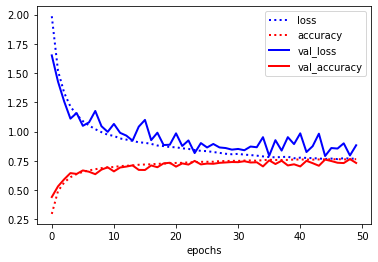

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers 

def build_model_1_1():
    model = models.Sequential()
    model.add(layers.Reshape((3072,), input_shape=(32,32,3)))
    model.add(layers.Dense(80, activation='sigmoid'))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_1", build_model_1_1, evaluation_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_1 = """
I added five layers in my sequential model. 
The first is a reshaper, to vectorize the features from 32*32*3 into 3072 values. 
This layer is followed by four dense layers shaped like a pyramid with 80 nodes 
for the first, then the number of nodes is halved for every subsequent layer, 
i.e. 40, 20 ,10 respectively. I use sigmoid first to compress the data between 
0 and 1. Next, I use ReLU twice because it is usually used when considering non-
linear data; and the pixels in the image are not linearly related to each other. 
Using ReLU introduces nonlinearity which matches the nature of the data and also
matches the problem of image classification being a nonlinear problem. 
The final layer is softmax with 10 nodes. That makes softmax give probabilities 
for the input belonging to each of the 10 classes. Then the class chosen by the 
model is the one with the highest probability in the softmax layer.
At 20 epochs, this gave accuracy of 72%. At 50 epochs, 75% accuracy.
               """
print("Answer is {} characters long".format(len(answer_q_1_1)))

### Question 1.2: Preprocessing (2 points)
Rerun the model, but now preprocess the data first by converting the images to 
greyscale. You can use the helper function below. If you want to do additional 
preprocessing, you can do that here, too.
* Store the preprocessed data as a tuple `preprocessed_split`
* Rerun and re-evaluate your model using the preprocessed data.
  * For the remainder of the assignment, always use the preprocessed data
* Explain what you did and interpret the results in 'answer_q_1_2'. Is the model
  better, if so, why?

In [0]:
# Luminance-preserving RGB to greyscale conversion
def rgb2gray(X):
    return np.expand_dims(np.dot(X, [0.2990, 0.5870, 0.1140]), axis=3)

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/50
63544/63544 [==============================] - 8s 125us/sample - loss: 1.9689 - accuracy: 0.3009 - val_loss: 1.5592 - val_accuracy: 0.4811
Epoch 2/50
63544/63544 [==============================] - 7s 114us/sample - loss: 1.4673 - accuracy: 0.5075 - val_loss: 1.5101 - val_accuracy: 0.4947
Epoch 3/50
63544/63544 [==============================] - 7s 113us/sample - loss: 1.2780 - accuracy: 0.5870 - val_loss: 1.1687 - val_accuracy: 0.6251
Epoch 4/50
63544/63544 [==============================] - 7s 112us/sample - loss: 1.1605 - accuracy: 0.6304 - val_loss: 1.2360 - val_accuracy: 0.5956
Epoch 5/50
63544/63544 [==============================] - 7s 114us/sample - loss: 1.0788 - accuracy: 0.6617 - val_loss: 1.0937 - val_accuracy: 0.6471
Epoch 6/50
63544/63544 [==============================] - 7s 111us/sample - loss: 1.0173 - accuracy: 0.6797 - val_loss: 0.9949 - val_accuracy: 0.6879
Epoch 7/50
63544/63544 [=======

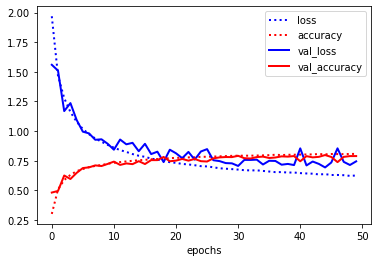

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers 

# Replace with the preprocessed data
preprocessed_split = rgb2gray(X_train), rgb2gray(X_val), y_train, y_val

# Adjusted model
def build_model_1_2():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(80, activation='sigmoid'))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(20, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Evaluate. Use a new name 'model_1_2' to not overwrite the previous trained model
run_evaluation("model_1_2", build_model_1_2, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=32)
answer_q_1_2 = """
I used the provided rgb2gray method and no further preprocessing. The model
returned considerably better results (up from 72% accuracy to 78%). The reason 
is that RGB data does not help identify the number in an image. Converting RGB
to greyscale reduces the complexity and size of the data which not only makes
the training and classification faster but also removes unnecessary infromation
that may otherwise sway the model into classifying features that are not related
to the problem. Considering unrelated properties causes unwanted bias in the 
model.
At 20 epochs, this gave a 77% accuracy model. At 50 epochs, 81%.
               """
print("Answer is {} characters long".format(len(answer_q_1_2)))

### Question 1.3: Regularization and tuning (4 points)
* Regularize the model. You can explore (and combine) different techniques. What works best?
* Tune other hyperparameters (e.g. learning rate, batch size,...) as you see fit.
* Explain your findings and final design decisions. Retrain the model again on the preprocessed data and discuss the results.
* Return your model in function 'build_model_1_3' and write your answer in 'answer_q_1_3'

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/50
63544/63544 [==============================] - 6s 101us/sample - loss: 2.0605 - accuracy: 0.2691 - val_loss: 1.6923 - val_accuracy: 0.4285
Epoch 2/50
63544/63544 [==============================] - 6s 101us/sample - loss: 1.4984 - accuracy: 0.5046 - val_loss: 1.3721 - val_accuracy: 0.5523
Epoch 3/50
63544/63544 [==============================] - 7s 103us/sample - loss: 1.2917 - accuracy: 0.5872 - val_loss: 1.2337 - val_accuracy: 0.6077
Epoch 4/50
63544/63544 [==============================] - 6s 99us/sample - loss: 1.1777 - accuracy: 0.6325 - val_loss: 1.1586 - val_accuracy: 0.6378
Epoch 5/50
63544/63544 [==============================] - 6s 99us/sample - loss: 1.1002 - accuracy: 0.6631 - val_loss: 1.1041 - val_accuracy: 0.6615
Epoch 6/50
63544/63544 [==============================] - 6s 97us/sample - loss: 1.0460 - accuracy: 0.6818 - val_loss: 1.0590 - val_accuracy: 0.6782
Epoch 7/50
63544/63544 [==========

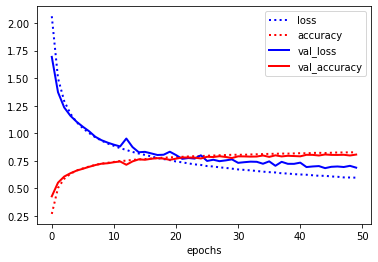

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Nadam

# Nadam learning rate 0.00125. batch size 48. Two kernel regularizers. accuracy = 0.8333
def build_model_1_3():
    model = models.Sequential()
    model.add(layers.Reshape((1024,), input_shape=(32,32,1)))
    model.add(layers.Dense(80, activation='sigmoid'))
    model.add(layers.Dense(40, activation='relu'))
    model.add(layers.Dense(20, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
    model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
    model.compile(optimizer=Nadam(learning_rate=0.00125),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

run_evaluation("model_1_3", build_model_1_3, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=48)

answer_q_1_3 = """
I ran about 60 experiments at 50 epochs. Findings:
Layers: Neither adding layers intermediate (60, 30 nodes) or above (160, 320 nodes), nor changing activations (ELU, tanh) nor Dropouts did imporve.
Best Batch size out of 8 values ranging from 16 to 128 was found 48.
Best Optimzer out of 7 different ones was Nadam.
Best Learning rate on Nadam=0.00125.
Kernel regularizer applied to the 20-node ReLU layer and softmax layer was good. On more layers is bad. Other regularizers were bad.
               """
print("Answer is {} characters long".format(len(answer_q_1_3)))

## Part 2. Convolutional neural networks (10 points)
### Question 2.1: Design a ConvNet (7 points)
- Build a sequential convolutional neural network. Try to achieve the best validation accuracy you can. You should be able to get at least 90% accuracy. You can use any depth, any combination of layers, and any kind of regularization and tuning. 
- Add a description of your design choices in 'answer_q_2_1': explain what you did and also why. Also discuss the performance of the model. Is it working well? Both the performance of the model and your explanations matter.
- You are allowed **800** characters for this answer (but don’t ramble).
- The name of the model should be 'model_2_1'. Evaluate it using the 'run_evaluation' function and the preprocessed data.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/50
63544/63544 [==============================] - 38s 596us/sample - loss: 1.4891 - accuracy: 0.6413 - val_loss: 0.6531 - val_accuracy: 0.8635
Epoch 2/50
63544/63544 [==============================] - 37s 581us/sample - loss: 0.5582 - accuracy: 0.8769 - val_loss: 0.4244 - val_accuracy: 0.9030
Epoch 3/50
63544/63544 [==============================] - 37s 578us/sample - loss: 0.4417 - accuracy: 0.8993 - val_loss: 0.3354 - val_accuracy: 0.9278
Epoch 4/50
63544/63544 [==============================] - 37s 589us/sample - loss: 0.4030 - accuracy: 0.9120 - val_loss: 0.3291 - val_accuracy: 0.9333
Epoch 5/50
63544/63544 [==============================] - 37s 585us/sample - loss: 0.3834 - accuracy: 0.9196 - val_loss: 0.4200 - val_accuracy: 0.9038
Epoch 6/50
63544/63544 [==============================] - 37s 580us/sample - loss: 0.3574 - accuracy: 0.9275 - val_loss: 0.3003 - val_accuracy: 0.9417
Epoch 7/50
63544/63544 [=

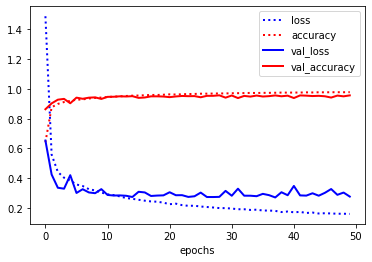

In [0]:
# 0.3 .3 .4 .5 .5 dropouts eight conv layers 32 32 64 64 128 128 256 256. 98 957 best
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras import regularizers
from tensorflow.keras.optimizers import Nadam

def build_model_2_1():
  model = models.Sequential()
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 1)))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.3))

  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.4))

  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.BatchNormalization())
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Dropout(0.5))

  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.001)))
  model.add(layers.BatchNormalization())
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.001)))
  model.compile(optimizer=Nadam(learning_rate=0.00125),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

  return model

run_evaluation("model_2_1", build_model_2_1, preprocessed_split, base_dir, 
               train=True, epochs=50, batch_size=48)
answer_q_2_1 = """
Starting with only two conv layers achieved the requirement but was very overfitted. So I added regularizers and dropouts, which were very effective in removing overfitting.
although dropouts increase val_accuracy, they reduce train accuracy significantly so I added more conv layers and increased droptouts gradually until I reached a balance where increasing dropout benefits no more.
Higher number of nodes did not help.
Other choices (optimizer, learning rate, batch size) carried on from 1.3. Changing them did not improve the model.
20 epochs are enough to achieve satisfactory val_accuracy, but more epochs reveal the overfitting more clearly.
I added batch normalization (after each conv layer) since it's useful with regularization and speeds up the training anyway.

               """
print("Answer is {} characters long".format(len(answer_q_2_1)))

### Question 2.2: Data Augmentation (3 points)

- Augment the preprocessed training data. You can explore using image shifts, rotations, zooming, flips, etc. What works well, and what does not?
- Evaluate the model from question 2.1 with the augmented data using the 'run_evaluation' function. Store the new trained model as 'model_2_2'.
- Add a description of your design choices in 'answer_q_2_2': explain what you did and also why. Also discuss the performance of the model.

Training the model


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/50
60/60 [==============================] - 5s 79ms/step - loss: 3.7685 - accuracy: 0.0995 - val_loss: 2.8124 - val_accuracy: 0.1910
Epoch 2/50
60/60 [==============================] - 4s 63ms/step - loss: 3.3862 - accuracy: 0.1151 - val_loss: 2.9569 - val_accuracy: 0.1484
Epoch 3/50
60/60 [==============================] - 4s 64ms/step - loss: 3.1334 - accuracy: 0.1667 - val_loss: 3.2315 - val_accuracy: 0.1463
Epoch 4/50
60/60 [==============================] - 4s 62ms/step - loss: 2.9199 - accuracy: 0.2245 - val_loss: 2.6227 - val_accuracy: 0.2179
Epoch 5/50
60/60 [==============================] - 4s 63ms/step - loss: 2.6880 - accuracy: 0.2849 - val_loss: 2.6197 - val_accuracy: 0.2262
Epoch 6/50
60/60 [==============================] - 4s 64ms/step - loss: 2.3725 - accuracy: 0.3599 - val_loss: 2.3436 - val_accuracy: 0.3226
Epoch 7/50
60/60 [==============================] - 4s 65ms/step - loss: 2.0769 - accuracy: 0.4536 - val_loss: 1.9565 - val_accuracy: 0.4759
Epoch 8/50
60

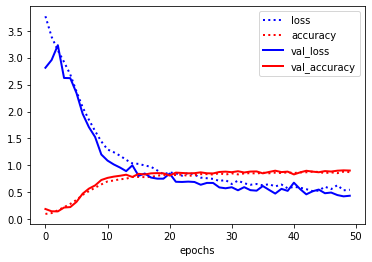

In [0]:
# Note that we build the same untrained model as in question 2.1 but store the 
# trained version as model_2_2. Change attributes as needed to run on augmented
# data
# 64 74

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    featurewise_center=True, 
    samplewise_center=False,
    featurewise_std_normalization=False, 
    samplewise_std_normalization=False,
    # zca_whitening=True, 
    # zca_epsilon=1e-04, 
    # rotation_range=30,
    # width_shift_range=0.2,
    # height_shift_range=0.2,
    brightness_range=None,
    # shear_range=0.1,
    # zoom_range=0.1,
    channel_shift_range=0.1, 
    # fill_mode='nearest', 
    fill_mode='wrap', 
    cval=0.1, 
    horizontal_flip=False,
    vertical_flip=False, 
    rescale=None, 
    preprocessing_function=None,
    data_format=None, 
    validation_split=0.0, 
    dtype=None
    )

augmented_train = train_datagen.flow(rgb2gray(X_train), y_train)
augmented_split = augmented_train, rgb2gray(X_val), y_val

run_evaluation("model_2_2", build_model_2_1, augmented_split, base_dir, 
               train=True, generator=True, epochs=50, batch_size=48)
answer_q_2_2 = """
this did not help in any scenario I tried. 
zca whitening was bad with different epsilons.
shear range and zoom range the more the worse.
rotation range, samplewise center, both std_normalizations were all bad.
samplewise_std_normalization caused much overfiting
horizontal flip is useless.
fill mode wrap and featurewise center were ok.
a consistent preprocessing rule is better than random augments. e.g. crop 10 pixels from right and left. Most digits lie entirely in the horizontal center. 

               """
print("Answer is {} characters long".format(len(answer_q_2_2)))

## Part 3. Model interpretation (10 points)
### Question 3.1: Interpreting misclassifications (2 points)
Study which errors are still made by your last model (model_2_2) by evaluating it on the test data. You do not need to retrain the model.
* What is the accuracy of model_2_2 on the test data? Store this in 'test_accuracy_3_1'.
* Plot the confusion matrix in 'plot_confusion_matrix' and discuss which classes are often confused.
* Visualize the misclassifications in more depth by focusing on a single
class (e.g. the number '2') and analyse which kinds of mistakes are made for that class. For instance, are the errors related to the background, noisiness, etc.? Implement the visualization in 'plot_misclassifications'.
* Summarize your findings in 'answer_q_3_1'

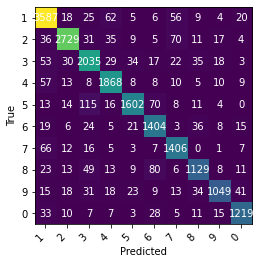

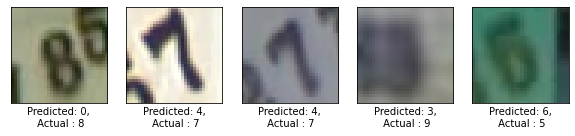

0.9078457045019639


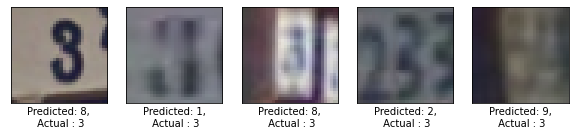

Answer is 466 characters long


In [0]:
from sklearn.metrics import confusion_matrix

# preprocess test data
X_test_gray = rgb2gray(X_test)

# load model 2_2
model = load_model_from_file(base_dir, "model_2_2")

# run model 2_2 on the test data
y_pred = model.predict(X_test_gray)

# misclassified_samples
misclassified_samples = np.nonzero(np.argmax(y_test, axis=1) != np.argmax(y_pred, axis=1))[0]

def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(
      ['1','2','3','4','5','6','7','8','9','0'], 
      rotation=45, ha="right")
  ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','0'])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")


def plot_misclassifications():
  # Visualize the (first five) misclassifications, together with the predicted and actual class
  fig, axes = plt.subplots(1, 5,  figsize=(10, 5))
  for nr, i in enumerate(misclassified_samples[:5]):
      axes[nr].imshow(X_test[i])
      axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (np.mod((np.argmax(y_pred[i])+1),10), np.mod((np.argmax(y_test[i])+1),10)))
      axes[nr].set_xticks(()), axes[nr].set_yticks(())

  plt.show();

# plot confusion matrix
plot_confusion_matrix()

# plot misclassifications
plot_misclassifications()

test_accuracy_3_1 = 1-(len(misclassified_samples)/len(X_test))
print(test_accuracy_3_1)


def plot_confusion_matrix():
  cm = confusion_matrix(np.argmax(y_test, axis=1),np.argmax(y_pred, axis=1))
  fig, ax = plt.subplots()
  im = ax.imshow(cm)
  ax.set_xticks(np.arange(10)), ax.set_yticks(np.arange(10))
  ax.set_xticklabels(
      ['1','2','3','4','5','6','7','8','9','0'], 
      rotation=45, ha="right")
  ax.set_yticklabels(['1','2','3','4','5','6','7','8','9','0'])
  ax.set_ylabel('True')
  ax.set_xlabel('Predicted')
  for i in range(100):
      ax.text(int(i/10),i%10,cm[i%10,int(i/10)], ha="center", va="center", color="w")


def plot_misclassifications():
  # Visualize the (first five) misclassifications, together with the predicted and actual class
  fig, axes = plt.subplots(1, 5,  figsize=(10, 5))

  misclassified_3 = []
  for nr, i in enumerate(misclassified_samples):
    if(np.mod((np.argmax(y_test[i])+1),10)) == 3:
      misclassified_3.append(misclassified_samples[nr])

  for nr, i in enumerate(misclassified_3[:5]):
      axes[nr].imshow(X_test[i])
      axes[nr].set_xlabel("Predicted: %s,\n Actual : %s" % (np.mod((np.argmax(y_pred[i])+1),10), np.mod((np.argmax(y_test[i])+1),10)))
      axes[nr].set_xticks(()), axes[nr].set_yticks(())

  plt.show();

# plot misclassifications
plot_misclassifications()

answer_q_3_1 = """
5 misclassified as 6 is the most common. the opposite is rare.so there is a bias towards 6.
2nd most is 7 misclassified as 1. The opposite is much less. perhaps must preprocess so that the horizontal top of 7 stands out.
3 of the 5 pictures shown are low quality, out of focus, or smudged. Some cases a neighbouring digit takes over like 0'1'0 misclassified as 0 instead of 1. hence the crop suggestion in 2.2. 
In class 3, 4 out of 5 are like that.
               """
print("Answer is {} characters long".format(len(answer_q_3_1)))

### Question 3.2: Visualizing activations (4 points)
* Implement a function `plot_activations()` that returns the most interesting activations (feature maps). Select the first example from the test set. Retrieve and visualize the activations of model 2_2 for that example (make sure you load that model in the function), for every filter for different convolutional layers (at different depths in the network).
* Give an explanation (as detailed as you can) about your observations in 'answer_q_3_2'. Is your model indeed learning something useful?

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


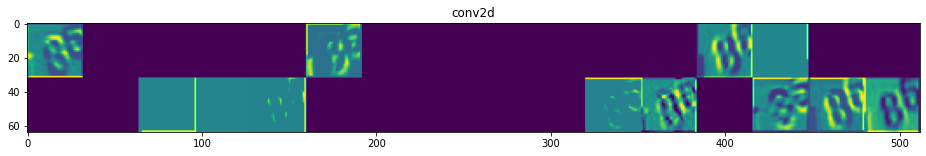

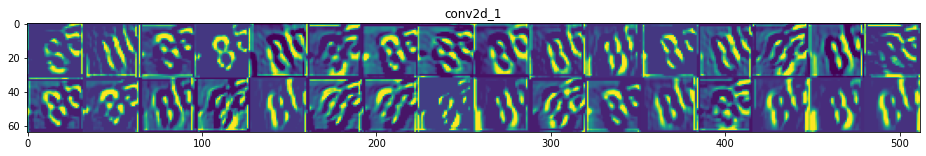

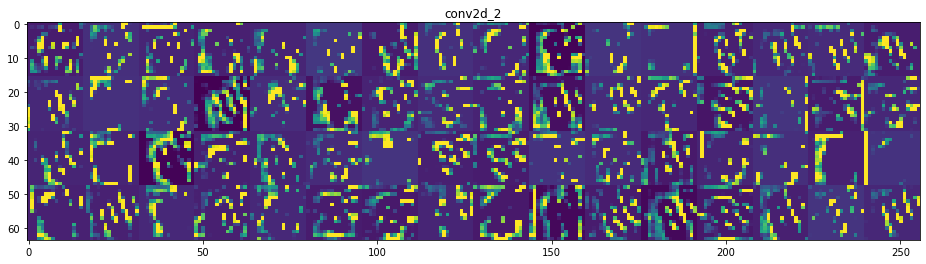

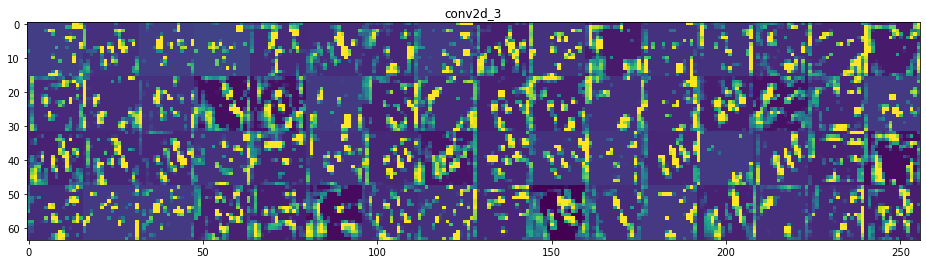

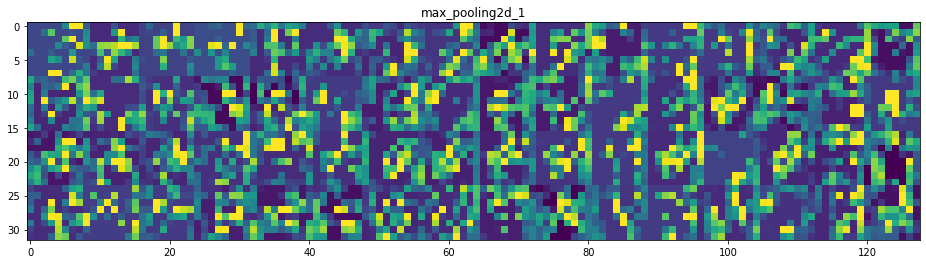

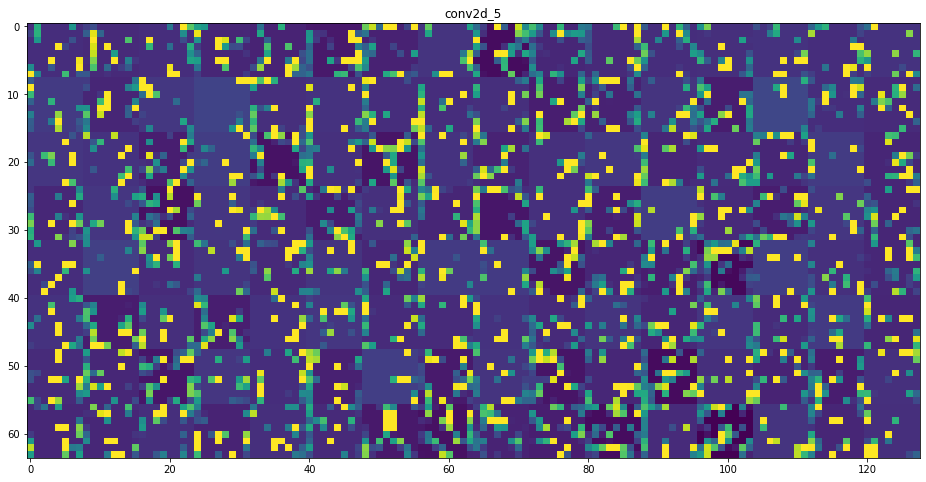

Answer is 367 characters long


In [0]:
# from tf.keras import models

# preprocess test data
X_test_gray = rgb2gray(X_test)

# load model 2_2
model = load_model_from_file(base_dir, "model_2_2")

img_tensor = np.expand_dims(X_test_gray[0], axis=0)

# Extracts the outputs of the top 8 layers:
# layer_outputs = [layer.output for layer in model.layers[:8]]
layer_outputs = [layer.output for layer in model.layers]
# Creates a model that will return these outputs, given the model input:
activation_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# This will return a list of 5 Numpy arrays:
# one array per layer activation
activations = activation_model.predict(img_tensor)

# img_tensor /= 255.
# plt.imshow(img_tensor[0])
# plt.show()

images_per_row = 16
start = 0
end = 1

layer_names = []
# for layer in model.layers[:8]:
for layer in model.layers[:15]:
    layer_names.append(layer.name)

def plot_activations_of_layer(num):
  start = num
  end = num+1
  plot_activations()

def plot_activations():
    # Now let's display our feature maps
    for layer_name, layer_activation in zip(layer_names[start:end], activations[start:end]):
        # This is the number of features in the feature map
        n_features = layer_activation.shape[-1]

        # The feature map has shape (1, size, size, n_features)
        size = layer_activation.shape[1]

        # We will tile the activation channels in this matrix
        n_cols = n_features // images_per_row
        display_grid = np.zeros((size * n_cols, images_per_row * size))

        # We'll tile each filter into this big horizontal grid
        for col in range(n_cols):
            for row in range(images_per_row):
                channel_image = layer_activation[0,
                                                 :, :,
                                                 col * images_per_row + row]
                # Post-process the feature to make it visually palatable
                channel_image -= channel_image.mean()
                channel_image /= channel_image.std()
                channel_image *= 64
                channel_image += 128
                channel_image = np.clip(channel_image, 0, 255).astype('uint8')
                display_grid[col * size : (col + 1) * size,
                             row * size : (row + 1) * size] = channel_image

        # Display the grid
        scale = 1. / size
        plt.figure(figsize=(scale * display_grid.shape[1],
                            scale * display_grid.shape[0]))
        plt.title(layer_name)
        plt.grid(False)
        plt.imshow(display_grid, aspect='auto', cmap='viridis')

    plt.show()
    
plot_activations_of_layer(0) # conv
plot_activations_of_layer(2) # conv
plot_activations_of_layer(6) # conv
plot_activations_of_layer(8) # conv
plot_activations_of_layer(10) # conv
plot_activations_of_layer(14) # conv
plot_activations_of_layer(16) # conv

answer_q_3_2 = """
The visualization shows that the model is indeed learning something useful. detecting edges and contours from different directions. 
we see it detecting featurs that discern 8 figure from 6 and 0 and 3 which are its common misclassifications.
The deeper the layer the less comprehensible but we see fourth layer detecting the circles inside the 8 and the borders of the shape.
               """
print("Answer is {} characters long".format(len(answer_q_3_2)))

### Question 3.3: Visualizing activations (4 points)
* Again, select the first example from the test set, and the trained model_2_2.
* Implement a function `plot_activation_map()` that builds and shows a class activation map for your last convolutional layer that highlights what the model is paying attention to when classifying the example.
* If possible, superimpossible the activation map over the image. If not, plot
them side by side. Implement a function 'plot_3_3' that returns the entire plot.

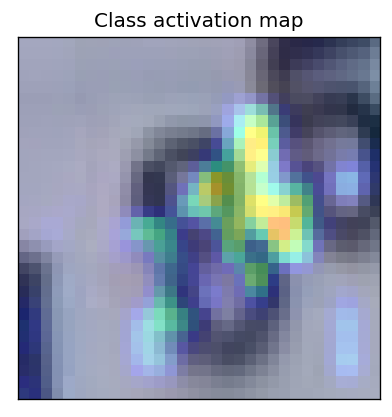

In [0]:
import cv2
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras import backend as K

def plot_3_3():
  plot_activation_map()

def plot_activation_map():
  # plot_activations(8,9)
  tf.compat.v1.disable_eager_execution()
  K.clear_session()
  model = load_model_from_file(base_dir, "model_2_2")
  img = X_test_gray[0]
  img_tensor = np.expand_dims(img, axis=0)
  img_pred = model.predict(img_tensor)

  img_output = model.output[:, np.argmax(img_pred[0])]
  # last_conv_layer = model.get_layer('conv2d_32')
  last_conv_layer = model.get_layer(index=8)

  # This is the gradient of the class with regard to
  # the output feature map of last conv layer
  grads = K.gradients(img_output, last_conv_layer.output)[0]

  # This is a vector of shape (512,), where each entry
  # is the mean intensity of the gradient over a specific feature map channel
  pooled_grads = K.mean(grads, axis=(0, 1, 2))

  # This function allows us to access the values of the quantities we just defined:
  # `pooled_grads` and the output feature map of the last conv layer,
  # given a sample image
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])

  # These are the values of these two quantities, as Numpy arrays,
  # given our sample image
  pooled_grads_value, conv_layer_output_value = iterate([img_tensor])

  # We multiply each channel in the feature map array
  # by "how important this channel is" with regard to the class
  for i in range(64):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  # The channel-wise mean of the resulting feature map
  # is our heatmap of class activation

  heatmap = np.mean(conv_layer_output_value, axis=-1)

  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)

  # Save the image to disk
  plt.imsave('img_33.png', X_test[0])
  img_png = cv2.imread('img_33.png')

  # We resize the heatmap to have the same size as the original image
  heatmap = cv2.resize(heatmap, (img_png.shape[1], img_png.shape[0]))

  # We convert the heatmap to RGB
  heatmap = np.uint8(255 * heatmap)

  # We apply the heatmap to the original image
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

  # 0.4 here is a heatmap intensity factor
  superimposed_img = heatmap * 0.4 + img_png

  # Save the image to disk
  cv2.imwrite('img_33_imposed.png', superimposed_img)

  img_im = cv2.imread('img_33_imposed.png')
  RGB_im = cv2.cvtColor(img_im, cv2.COLOR_BGR2RGB)

  plt.rcParams['figure.dpi'] = 120
  plt.imshow(RGB_im)
  plt.title('Class activation map')
  plt.xticks([])
  plt.yticks([])
  # plt.matshow(heatmap)
  plt.show()

plot_3_3()

## Part 4. Transfer learning (10 points)
### Question 4.1 Fast feature extraction with VGG16 (5 points)
- Import the VGG16 model, pretrained on ImageNet. [See here](https://keras.io/applications/). Only import the convolutional part, not the dense layers.
- Implement a function 'build_model_4_1` that adds a dense layer to the convolutional base, and freezes the convolutional base. Consider unfreezing the last few convolutional layers and evaluate whether that works better.
- Train the resulting model on the *original* (colored) training data
- Evaluate the resulting model using 'run_evaluate'. Discuss the observed performance in 'answer_q_4_1'.

Training the model
Train on 63544 samples, validate on 15887 samples
Epoch 1/10
63544/63544 [==============================] - 22s 343us/sample - loss: 0.1762 - accuracy: 0.9352 - val_loss: 0.1424 - val_accuracy: 0.9468
Epoch 2/10
63544/63544 [==============================] - 21s 333us/sample - loss: 0.1254 - accuracy: 0.9536 - val_loss: 0.1247 - val_accuracy: 0.9531
Epoch 3/10
63544/63544 [==============================] - 21s 333us/sample - loss: 0.1081 - accuracy: 0.9603 - val_loss: 0.1131 - val_accuracy: 0.9580
Epoch 4/10
63544/63544 [==============================] - 21s 334us/sample - loss: 0.0973 - accuracy: 0.9641 - val_loss: 0.1045 - val_accuracy: 0.9612
Epoch 5/10
63544/63544 [==============================] - 21s 333us/sample - loss: 0.0892 - accuracy: 0.9673 - val_loss: 0.0956 - val_accuracy: 0.9650
Epoch 6/10
63544/63544 [==============================] - 21s 333us/sample - loss: 0.0821 - accuracy: 0.9700 - val_loss: 0.0994 - val_accuracy: 0.9631
Epoch 7/10
63544/63544 [=

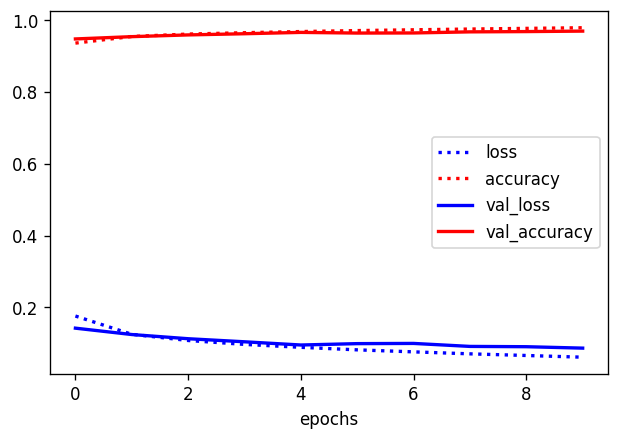

In [0]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import backend as K

def build_model_4_1():
  model = models.Sequential()
  conv_base = VGG16(include_top=False, 
                    input_shape=(32, 32, 3), 
                    classes=10, 
                    pooling='avg',)
  
  # for layer in conv_base.layers:
  #   layer.trainable = False
  conv_base.trainable = True

  for layer in conv_base.layers:
    if layer.name.startswith('block5_conv'):
        layer.trainable = True
    else:
        layer.trainable = False

  model.add(conv_base)
  model.add(layers.Flatten())
  model.add(layers.Dense(256, activation='relu'))
  model.add(layers.Dense(10, activation='softmax'))
  
  # for layer in model.layers[0].layers[:14]:
  #   layer.trainable = False
  
  model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
                loss='binary_crossentropy',
                metrics=['accuracy'])
  
  return model
  

run_evaluation("model_4_1", build_model_4_1, evaluation_split, base_dir, 
               train=True, epochs=10, batch_size=48)
answer_q_4_1 = """
Freezing all conv layers gives 90% acc and 90% val_acc at 10 epochs. 
Unfreezing the last 3 conv layers achieves 98% acc and 97% val_acc, a big improvement. no overfitting. clean curve.
pretrained vgg16 is very effective in visual classification together with transfer learning given last three conv layers are trained.
               """
print("Answer is {} characters long".format(len(answer_q_4_1)))

### Question 4.2 Embeddings and pipelines (5 points)
- Generate embeddings of the original images by running them through the trained convolutional part of model_4_1 (without the dense layer) and returning the output. Embed the training and test data and store them to disk using the helper functions below. Implement a function `store_embeddings` that loads model_4_1 and stores all necessary embeddings to file. Make sure to run it once so that the embeddings are stored (and submitted).
- Implement a function 'generate_pipeline' that returns an scikit-learn pipeline. You can use any non-deep learning technique (eg. SVMs, RFs,...), and preprocessing technique. You can do model selection using the validation set. 
- Implement a function 'evaluate_pipeline' that evaluates a given pipeline on a given training and test set. 
- Implement a function 'evaluation_4_2' that evaluates your pipeline on the embedded training and test set (loaded from file) and returns the accuracy. 
- Describe what you did and what you observed. Report the obtained accuracy score. Can you beat your best model thus far?

In [23]:
# random forst .82 standard scaler
# svm standard scaler .8354
import pickle
import gzip
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression;
from sklearn.svm import SVC;
from sklearn.ensemble import RandomForestClassifier;
from sklearn.preprocessing import PowerTransformer;
from sklearn.preprocessing import Normalizer;
from sklearn.preprocessing import StandardScaler;
from sklearn.model_selection import StratifiedKFold

def store_embedding(X, name):  
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'wb') as file_pi:
    pickle.dump(X, file_pi)

def load_embedding(name):
  with gzip.open(os.path.join(base_dir, name+'_embedding.p'), 'rb') as file_pi:
    return pickle.load(file_pi)

def store_embeddings():
  """ Stores all necessary embeddings to file
  """
  model = load_model_from_file(base_dir, "model_4_1").layers[0]
  embedding_train = model.predict(X_train)
  embedding_test = model.predict(X_test)
  store_embedding(embedding_train, 'Train')
  store_embedding(embedding_test, 'Test')

def generate_pipeline():
  """ Returns an sklearn pipeline.
  """
  thepipeline = Pipeline([
           ('preprocessor', StandardScaler()),
           ('classifier', SVC(kernel="rbf", random_state=1))
           ])
  return thepipeline

def evaluate_pipeline(pipeline, X_train, y_train, X_test, y_test):
  """ Evaluates the given pipeline, trained on the given embedded training set and 
      evaluated on the supplied embedded test set. Returns the accuracy score.
  """
  pipeline.fit(X_train, y_train)
  evaluation = pipeline.score(X_test, y_test)
  return evaluation

def evaluation_4_2(X_train, y_train, X_test, y_test):
  """ Runs 'evaluate_pipeline' with embedded versions of the input data 
  and returns the accuracy.
  """
  #store embeddings only if not stored already to save time
  if (not os.path.isfile(base_dir + '/Train_embedding.p') 
     or not os.path.isfile(base_dir + '/Test_embedding.p')):
    store_embeddings()
  train_embedding = load_embedding('Train')
  test_embedding = load_embedding('Test')

  y_train_labels = [np.mod((np.argmax(i)+1),10) for i in y_train]
  y_test_labels = [np.mod((np.argmax(i)+1),10) for i in y_test]
  #finally get accuracy evaluation
  evaluation = evaluate_pipeline(generate_pipeline(),
                               train_embedding,
                               y_train_labels,
                               test_embedding,
                               y_test_labels)
  return evaluation

accuracy = evaluation_4_2(X_train, y_train, X_test, y_test)
print("Accuracy: ",accuracy)

answer_q_4_2 = """
I made a pipeline similar to assignment 2. Tried SVM, logistic regresssion and RF with multiple scalers.
SVM with StandardScaler performed the best at 83.5% yet all combinations of imported classifiers and scalers were tested and performed very closely.
Trying different SVM parameters did not improve either.
It appears that non-deep-learning classifiers are worse extensions to CNNs than dense layers.
               """
print("Pipeline:",generate_pipeline())
print("Answer is {} characters long".format(len(answer_q_4_2)))

Accuracy:  0.8354315641051465
Pipeline: Pipeline(memory=None,
         steps=[('preprocessor',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=1, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)
Answer is 364 characters long
